In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('sales.db')
cursor = conn.cursor()

In [3]:
queries_create = '''
    CREATE TABLE IF NOT EXISTS online_sales(
        `Transaction ID` INT, 
        Date DATE, 
        `Product Category` VARCHAR(50),
        `Product Name` VARCHAR(50),
        `Units Sold` VARCHAR(50),
        `Unit Price` DECIMAL(10,2),
        `Total Revenue` DECIMAL(10,2),
        Region VARCHAR(50),
        `Payment Method` VARCHAR(50)
    )
'''

cursor.execute(queries_create)

In [4]:
queries_insert_1 = '''
    INSERT INTO online_sales(
        `Transaction ID`, 
        Date, 
        `Product Category`, 
        `Product Name`, 
        `Units Sold`, 
        `Unit Price`,
        `Total Revenue`,
        Region,
        `Payment Method`
    ) VALUES
        (10001,"2024-01-01","Electronics","iPhone 14 Pro",2,999.99,1999.98,"North America","Credit Card"),
        (10002,"2024-01-02","Home Appliances","Dyson V11 Vacuum",1,499.99,499.99,"Europe","PayPal"),
        (10003,"2024-01-03","Clothing","Levi's 501 Jeans",3,69.99,209.97,"Asia","Debit Card"),
        (10004,"2024-01-04","Books","The Da Vinci Code",4,15.99,63.96,"North America","Credit Card"),
        (10005,"2024-01-05","Beauty Products","Neutrogena Skincare Set",1,89.99,89.99,"Europe","PayPal"),
        (10006,"2024-01-06","Sports","Wilson Evolution Basketball",5,29.99,149.95,"Asia","Credit Card"),
        (10007,"2024-01-07","Electronics","MacBook Pro 16-inch",1,2499.99,2499.99,"North America","Credit Card"),
        (10008,"2024-01-08","Home Appliances","Blueair Classic 480i",2,599.99,1199.98,"Europe","PayPal"),
        (10009,"2024-01-09","Clothing","Nike Air Force 1",6,89.99,539.94,"Asia","Debit Card"),
        (10010,"2024-01-10","Books","Dune by Frank Herbert",2,25.99,51.98,"North America","Credit Card"),
        (10011,"2024-01-11","Beauty Products","Chanel No. 5 Perfume",1,129.99,129.99,"Europe","PayPal"),
        (10012,"2024-01-12","Sports","Babolat Pure Drive Tennis Racket",3,199.99,599.97,"Asia","Credit Card"),
        (10013,"2024-01-13","Electronics","Samsung Galaxy Tab S8",2,749.99,1499.98,"North America","Credit Card"),
        (10014,"2024-01-14","Home Appliances","Keurig K-Elite Coffee Maker",1,189.99,189.99,"Europe","PayPal"),
        (10015,"2024-01-15","Clothing","North Face Down Jacket",2,249.99,499.98,"Asia","Debit Card"),
        (10016,"2024-01-16","Books","Salt, Fat, Acid, Heat by Samin Nosrat",3,35.99,107.97,"North America","Credit Card"),
        (10017,"2024-01-17","Beauty Products","Dyson Supersonic Hair Dryer",1,399.99,399.99,"Europe","PayPal"),
        (10018,"2024-01-18","Sports","Manduka PRO Yoga Mat",4,119.99,479.96,"Asia","Credit Card"),
        (10019,"2024-01-19","Electronics","Garmin Forerunner 945",2,499.99,999.98,"North America","Credit Card"),
        (10020,"2024-01-20","Home Appliances","Ninja Professional Blender",1,99.99,99.99,"Europe","PayPal"),
        (10021,"2024-01-21","Clothing","Zara Summer Dress",3,59.99,179.97,"Asia","Debit Card"),
        (10022,"2024-01-22","Books","Gone Girl by Gillian Flynn",2,22.99,45.98,"North America","Credit Card"),
        (10023,"2024-01-23","Beauty Products","Olay Regenerist Face Cream",1,49.99,49.99,"Europe","PayPal"),
        (10024,"2024-01-24","Sports","Adidas FIFA World Cup Football",3,29.99,89.97,"Asia","Credit Card"),
        (10025,"2024-01-25","Electronics","Bose QuietComfort 35 Headphones",1,299.99,299.99,"North America","Credit Card"),
        (10026,"2024-01-26","Home Appliances","Panasonic NN-SN966S Microwave",1,179.99,179.99,"Europe","PayPal"),
        (10027,"2024-01-27","Clothing","Adidas Ultraboost Shoes",2,179.99,359.98,"Asia","Debit Card"),
        (10028,"2024-01-28","Books","Pride and Prejudice by Jane Austen",3,12.99,38.97,"North America","Credit Card"),
        (10029,"2024-01-29","Beauty Products","MAC Ruby Woo Lipstick",1,29.99,29.99,"Europe","PayPal"),
        (10030,"2024-01-30","Sports","Nike Air Zoom Pegasus 37",2,129.99,259.98,"Asia","Credit Card"),
        (10031,"2024-01-31","Electronics","Sony WH-1000XM4 Headphones",2,349.99,699.98,"North America","Credit Card")
'''

cursor.execute(queries_insert_1)
    

In [5]:
query_select_category = '''
    SELECT `Product Category`, 
        SUM(`Units Sold`) AS `Total Unit Sold`, 
        SUM(`Unit Price` * `Units Sold`) AS `Revenue by Category` 
        FROM online_sales 
        GROUP BY `Product Category`
'''

cursor.execute(query_select_category)
rows_1 = cursor.fetchall()

for row in rows_1 :
    print(row)

('Beauty Products', 5, 699.95)
('Books', 14, 308.86)
('Clothing', 16, 1789.84)
('Electronics', 10, 7999.9)
('Home Appliances', 6, 2169.94)
('Sports', 17, 1579.83)


In [6]:
df_sales = pd.read_sql_query(query_select_category, conn)

In [7]:
df_sales

,Product Category,Total Unit Sold,Revenue by Category
0,Beauty Products,5,699.95
1,Books,14,308.86
2,Clothing,16,1789.84
3,Electronics,10,7999.90
4,Home Appliances,6,2169.94
5,Sports,17,1579.83


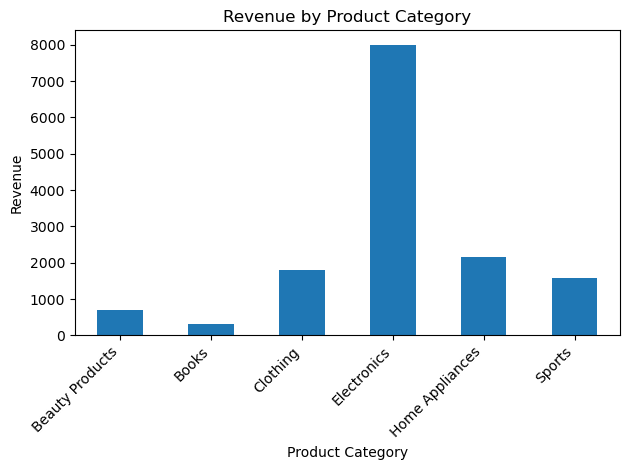

In [13]:
df_sales.plot(kind='bar', x='Product Category', y='Revenue by Category', legend=False)
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [11]:
plt.savefig('sales_chart.png')

<Figure size 640x480 with 0 Axes>